<a href="https://colab.research.google.com/github/8dci/T5/blob/main/DBSCAN_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**DBSCAN**


#Step 1 : Import Libraries



In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

#Step 2 : Prepare dataset
###**use make blobs with different numbers**



In [7]:
X, y_true = make_blobs(n_samples=400, centers=6,
                       cluster_std=0.50, random_state=0)

#Step 3 : Modeling The Data Using DBSCAN



['y', 'b', 'g', 'r', 'w', 'c']


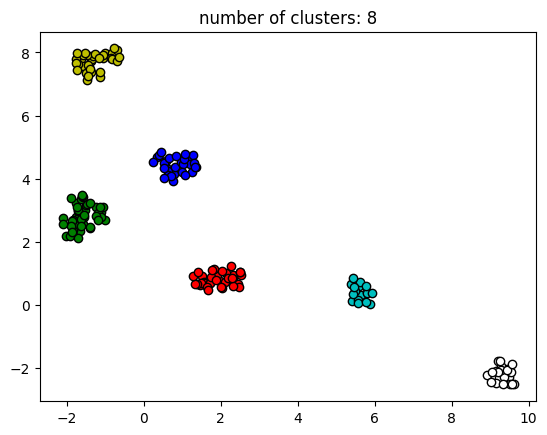

In [8]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Plot result

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r','w','c']
print(colors)
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)

plt.title('number of clusters: %d' % n_clusters_)
plt.show()

#Step 4 : Evaluation Metrics For DBSCAN Algorithm In Machine Learning


In [9]:
# evaluation metrics
from sklearn import metrics
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient:%0.2f" % sc)
ari = metrics.adjusted_rand_score(y_true, labels) # Import adjusted_rand_score
print("Adjusted Rand Index: %0.2f" % ari)

Silhouette Coefficient:-0.03
Adjusted Rand Index: 0.20


#**Well Done :)**